## CLs Technique and Persistence Entropy in Searching for $H\to gg$ in Boosted ZH at HL-LHC

Sum for bin 0: 0.0
Sum for bin 1: 0.0
Sum for bin 2: 0.0
Sum for bin 3: 0.0
Sum for bin 4: 0.0
Sum for bin 5: 0.0
Sum for bin 6: 0.0
Sum for bin 7: 0.0
Sum for bin 8: 0.0
Sum for bin 9: 0.0
Sum for bin 10: 0.0
Sum for bin 11: 92.79567345
Sum for bin 12: 373.82089379999996
Sum for bin 13: 653.982253776
Sum for bin 14: 654.96217771
Sum for bin 15: 1131.2843871659998
Sum for bin 16: 1593.684105942
Sum for bin 17: 2254.831674772
Sum for bin 18: 2826.111756361999
Sum for bin 19: 4691.386099273999
Sum for bin 20: 4694.003179157999
Sum for bin 21: 5723.79111056
Sum for bin 22: 5630.283224895999
Sum for bin 23: 4623.148437048
Sum for bin 24: 5829.872798292
Sum for bin 25: 5177.6244198819995
Sum for bin 26: 6379.891532578001
Sum for bin 27: 6207.223907457999
Sum for bin 28: 5538.494972291999
Sum for bin 29: 5168.332961972
Sum for bin 30: 4053.023538505999
Sum for bin 31: 3668.73600505
Sum for bin 32: 2828.5910703519994
Sum for bin 33: 3474.6748492119996
Sum for bin 34: 3388.5733530260004
Sum fo

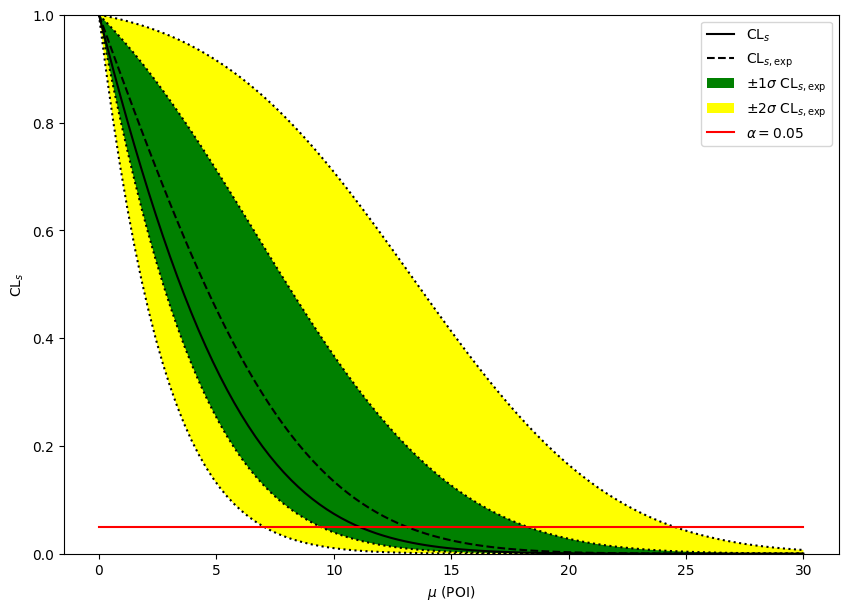

In [3]:
import ROOT
import numpy as np
import pyhf
from pyhf.contrib.viz import brazil
import matplotlib.pyplot as plt

# Open the ROOT files
score_file = ROOT.TFile("BDT_score.root")

# Read the histograms from the files
sig_hist = score_file.Get("h_exp_sig")
zjet_hist = score_file.Get("h_exp_zjet")
zhbb_hist = score_file.Get("h_exp_zhbb")
zhcc_hist = score_file.Get("h_exp_zhcc")
zh4q_hist = score_file.Get("h_exp_zh4q")
zzqq_hist = score_file.Get("h_exp_zzqq")
zwqq_hist = score_file.Get("h_exp_zwqq")
tt_hist = score_file.Get("h_exp_tt")

nbins = 60
xmin = -1.0
xmax = 1.0

# # Rebin the histograms with the same binning
# bkg_hist.Rebin(nbins, f"sig_rebinned", np.linspace(xmin, xmax, nbins + 1))
# bkg_hist.Rebin(nbins, f"bkg_rebinned", np.linspace(xmin, xmax, nbins + 1))

# Extract the bin contents into NumPy arrays
sig_array = np.zeros(nbins)
zjet_array = np.zeros(nbins)
zhbb_array = np.zeros(nbins)
zhcc_array = np.zeros(nbins)
zh4q_array = np.zeros(nbins)
zzqq_array = np.zeros(nbins)
zwqq_array = np.zeros(nbins)
tt_array = np.zeros(nbins)

sig_array_unc = np.zeros(nbins)
zjet_array_unc = np.zeros(nbins)
zhbb_array_unc = np.zeros(nbins)
zhcc_array_unc = np.zeros(nbins)
zh4q_array_unc = np.zeros(nbins)
zzqq_array_unc = np.zeros(nbins)
zwqq_array_unc = np.zeros(nbins)
tt_array_unc = np.zeros(nbins)

sigWeight = 0.0031132
zjetWeight = 92.79567345
zhbbWeight = 0.06324864
zhccWeight = 0.003139626
zh4qWeight = 0.01182654
zzqqWeight = 0.867
zwqqWeight = 0.9042
ttWeight = 231.579

for i in range(1, nbins + 1):    
    sig_array[i - 1] = sig_hist.GetBinContent(i-1) * sigWeight    
    zjet_array[i - 1] = zjet_hist.GetBinContent(i-1) * zjetWeight
    zhbb_array[i - 1] = zhbb_hist.GetBinContent(i-1) * zhbbWeight
    zhcc_array[i - 1] = zhcc_hist.GetBinContent(i-1) * zhccWeight    
    zh4q_array[i - 1] = zh4q_hist.GetBinContent(i-1) * zh4qWeight
    zzqq_array[i - 1] = zzqq_hist.GetBinContent(i-1) * zzqqWeight
    zwqq_array[i - 1] = zwqq_hist.GetBinContent(i-1) * zwqqWeight        
    tt_array[i - 1] = tt_hist.GetBinContent(i) * ttWeight
sums_per_bin = sig_array + zjet_array + zhbb_array + zhcc_array + zh4q_array + zzqq_array + zwqq_array + tt_array

# If you want to see the sum for each bin index:
for i, bin_sum in enumerate(sums_per_bin, start=1):
    print(f"Sum for bin {i-1}: {bin_sum}")

def combine_bins(arr):
    bin_0_to_12 = np.sum(arr[0:12])
    bin_42_to_50 = np.sum(arr[50:60])
    return np.array([bin_0_to_12] + list(arr[12:50]) + [bin_42_to_50])

def recalculate_uncertainty(combined_array):
    return np.sqrt(combined_array)

zjet_array = combine_bins(zjet_array)
zjet_array_unc = recalculate_uncertainty(zjet_array)

zhbb_array = combine_bins(zhbb_array)
zhbb_array_unc = recalculate_uncertainty(zhbb_array)

zhcc_array = combine_bins(zhcc_array)
zhcc_array_unc = recalculate_uncertainty(zhcc_array)

zh4q_array = combine_bins(zh4q_array)
zh4q_array_unc = recalculate_uncertainty(zh4q_array)

zzqq_array = combine_bins(zzqq_array)
zzqq_array_unc = recalculate_uncertainty(zzqq_array)

zwqq_array = combine_bins(zwqq_array)
zwqq_array_unc = recalculate_uncertainty(zwqq_array)

tt_array = combine_bins(tt_array)
tt_array_unc = recalculate_uncertainty(tt_array)

sig_array = combine_bins(sig_array)
sig_array_unc = recalculate_uncertainty(sig_array)

epsilon = 1e-9
bkg_array = zjet_array + zhbb_array + zhcc_array + zh4q_array + zzqq_array + zwqq_array + tt_array
bkg_array_unc = np.sqrt(zjet_array_unc**2 + zhbb_array_unc**2 + zhcc_array_unc**2 + zh4q_array_unc**2 + zzqq_array_unc**2 + zwqq_array_unc**2 + tt_array_unc**2)
bkg_array = np.asarray(bkg_array) + epsilon

for idx in range(0,len(sig_array)):
    print(sig_array[idx] + bkg_array[idx])

def sample_sig_bkg(sig_mu, sig_unc, bkg_mu, bkg_unc):
    """Create sample data by sampling signal and background from mu, sigma.

    Assumes normal distribution for sampling.
    """
    res = []
    for mu1, sig1, mu2, sig2 in zip(sig_mu, sig_unc, bkg_mu, bkg_unc):
        val = np.random.normal(mu1, sig1) + np.random.normal(mu2, sig2)
        val = max(val, 1e-9)
        res.append(val)
    return res

model = pyhf.simplemodels.uncorrelated_background(
    signal=sig_array,
    bkg=bkg_array,
    bkg_uncertainty=bkg_array_unc,
)


sum_sig = np.sum(sig_array)
print("sig total:", sum_sig)

sum_bkg = np.sum(bkg_array)
print("bkg total:", sum_bkg)

#print(sig_array)
#print(bkg_array)
data = sample_sig_bkg(
    sig_array, sig_array_unc, bkg_array, bkg_array_unc
)
data = pyhf.tensorlib.astensor(data+ model.config.auxdata)

#print(data)

mu_tests = np.linspace(0, 30, 100)
(
    obs_limit,
    exp_limits,
    (poi_tests, tests),
) = pyhf.infer.intervals.upper_limits.upper_limit(
    data, model, mu_tests, level=0.05, return_results=True,
    par_bounds= [(0,40)]
)

print(obs_limit)
print(exp_limits)
fig, ax = plt.subplots(figsize=(10, 7))
artists = brazil.plot_results(mu_tests, tests, test_size=0.05, ax=ax)

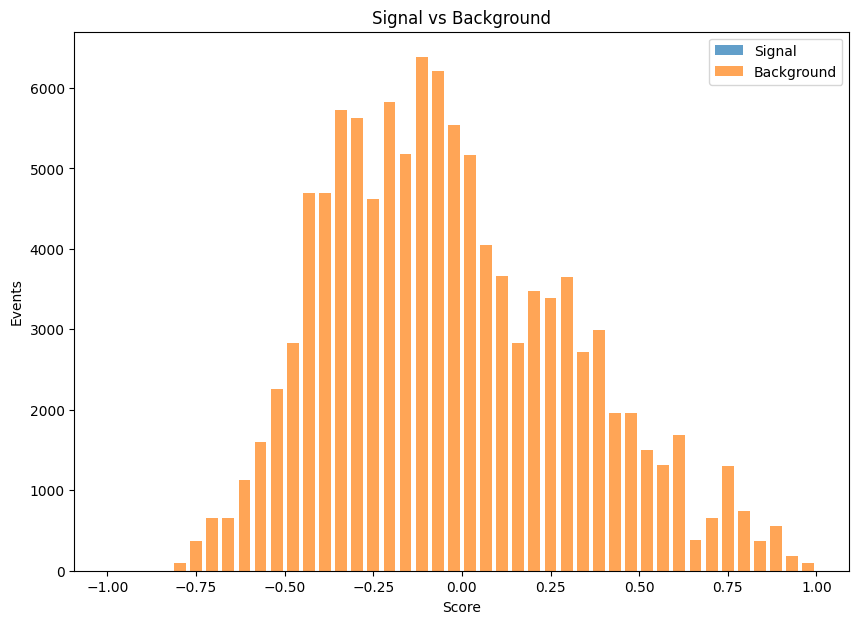

In [4]:
import matplotlib.pyplot as plt

# Define the edges of the bins; assumes nbins and the range are defined as in your script
bin_edges = np.linspace(xmin, xmax, 45)

# Calculate the bin centers from the edges for plotting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histograms
plt.figure(figsize=(10, 7))
plt.bar(bin_centers, sig_array, width=(xmax-xmin)/nbins, label='Signal', alpha=0.7)
plt.bar(bin_centers, bkg_array, width=(xmax-xmin)/nbins, label='Background', alpha=0.7)

# Add some plot labels and legend
plt.xlabel('Score')
plt.ylabel('Events')
plt.title('Signal vs Background')
plt.legend()

# Show the plot
plt.show()

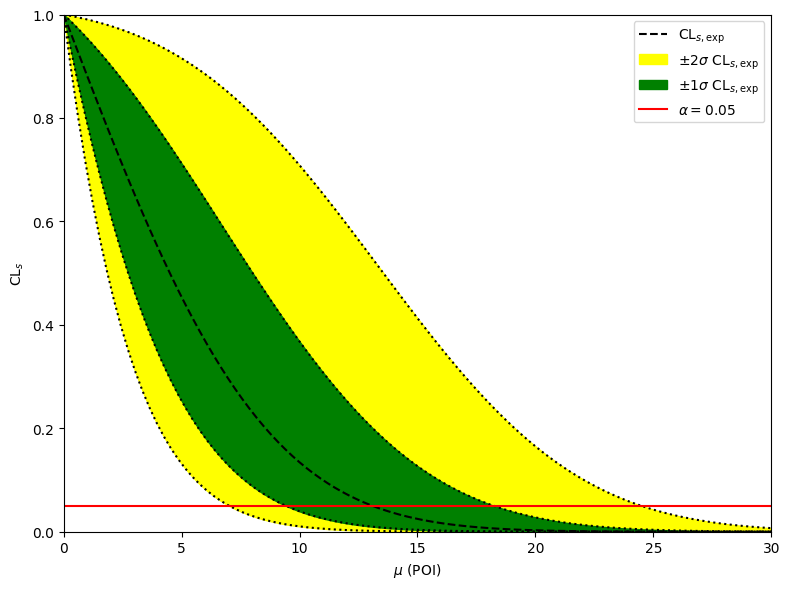

In [4]:
import matplotlib.pyplot as plt
import numpy as np
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Set the text rendering engine to LaTeX


# Extract the data from the cls_exp lines
cls_exp_data = [line.get_data() for line in artists.cls_exp]

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the third cls_exp line
ax.plot(cls_exp_data[2][0], cls_exp_data[2][1], linestyle='--', color='black', label=r"$\mathrm{CL}_{s,\mathrm{exp}}$")
ax.plot(cls_exp_data[0][0], cls_exp_data[0][1], linestyle=':', color='black')
ax.plot(cls_exp_data[1][0], cls_exp_data[1][1], linestyle=':', color='black')
ax.plot(cls_exp_data[3][0], cls_exp_data[3][1], linestyle=':', color='black')
ax.plot(cls_exp_data[4][0], cls_exp_data[4][1], linestyle=':', color='black')

# Plot the yellow band (area between the first and fifth cls_exp lines)
ax.fill_between(cls_exp_data[0][0], cls_exp_data[0][1], cls_exp_data[4][1], color='yellow', alpha=1, label=r"$\pm2\sigma~\mathrm{CL}_{s,\mathrm{exp}}$")
# Plot the green band (area between the second and fourth cls_exp lines)
ax.fill_between(cls_exp_data[1][0], cls_exp_data[1][1], cls_exp_data[3][1], color='green', alpha=1, label=r"$\pm1\sigma~\mathrm{CL}_{s,\mathrm{exp}}$")
ax.axhline(y=0.05, color='red', linestyle='-', linewidth=1.5, label=r"$\alpha=0.05$")

# Customize the plot
ax.set_xlabel(r"$\mu~\mathrm{(POI)}$")
ax.set_ylabel(r"$\mathrm{CL}_{s}$")
ax.set_xlim(min(cls_exp_data[2][0]), max(cls_exp_data[2][0]))
ax.set_ylim(0, 1)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
import ROOT
import numpy as np
import pyhf
from pyhf.contrib.viz import brazil
import matplotlib.pyplot as plt

# Open the ROOT files
sig_file = ROOT.TFile("sig_zh_lo_250GeV_14TeV_test_saved.root")
bkg_file = ROOT.TFile("bkg_zjets_lo_250GeV_14TeV_test_saved.root")

sig_tree = sig_file.Get("HistData")

# Get the TLeaf object
sig_hmass_leaf = sig_tree.GetLeaf("hmass")

# Create a histogram with a specific range
sig_hist = ROOT.TH1F("sig_hmass_hist", "Histogram of hmass (100-150)", 15, 100, 150)

# Fill the histogram with the data from the TLeaf within the specified range
for i in range(sig_tree.GetEntries()):
    sig_tree.GetEntry(i)
    sig_hmass_value = sig_hmass_leaf.GetValue()
    if 100 <= sig_hmass_value <= 150:
        sig_hist.Fill(sig_hmass_value)

bkg_tree = bkg_file.Get("HistData")

# Get the TLeaf object
bkg_hmass_leaf = bkg_tree.GetLeaf("hmass")

# Create a histogram with a specific range
bkg_hist = ROOT.TH1F("bkg_hmass_hist", "Histogram of hmass (100-150)", 15, 100, 150)

# Fill the histogram with the data from the TLeaf within the specified range
for i in range(bkg_tree.GetEntries()):
    bkg_tree.GetEntry(i)
    bkg_hmass_value = bkg_hmass_leaf.GetValue()
    if 100 <= bkg_hmass_value <= 150:
        bkg_hist.Fill(bkg_hmass_value)

nbins = 100
xmin = 100
xmax = 150

# # Rebin the histograms with the same binning
# sig_hist.Rebin(nbins, f"sig_rebinned", np.linspace(xmin, xmax, nbins + 1))
# bkg_hist.Rebin(nbins, f"bkg_rebinned", np.linspace(xmin, xmax, nbins + 1))

# Extract the bin contents into NumPy arrays
sig_array = np.zeros(nbins)
bkg_array = np.zeros(nbins)
sig_array_unc = np.zeros(nbins)
bkg_array_unc = np.zeros(nbins)

sigWeight = 0.0031132
bkgWeight = 92.79567345
for i in range(1, nbins + 1):
    sig_array[i - 1] = sig_hist.GetBinContent(i) * sigWeight
    bkg_array[i - 1] = bkg_hist.GetBinContent(i) * bkgWeight
    sig_array_unc[i - 1] = np.sqrt(sig_hist.GetBinContent(i) * sigWeight)
    bkg_array_unc[i - 1] = np.sqrt(bkg_hist.GetBinContent(i) * bkgWeight)
epsilon = 1e-9
bkg_array = np.asarray(bkg_array) + epsilon
def sample_sig_bkg(sig_mu, sig_unc, bkg_mu, bkg_unc):
    """Create sample data by sampling signal and background from mu, sigma.

    Assumes normal distribution for sampling.
    """
    res = []
    for mu1, sig1, mu2, sig2 in zip(sig_mu, sig_unc, bkg_mu, bkg_unc):
        val = np.random.normal(mu1, sig1) + np.random.normal(mu2, sig2)
        val = max(val, 1e-9)
        res.append(val)
    return res

model = pyhf.simplemodels.uncorrelated_background(
    signal=sig_array,
    bkg=bkg_array,
    bkg_uncertainty=bkg_array_unc,
)

sum_sig = np.sum(sig_array)
print("sig total:", sum_sig)

sum_bkg = np.sum(bkg_array)
print("bkg total:", sum_bkg)

#print(sig_array)
#print(bkg_array)
data = sample_sig_bkg(
    sig_array, sig_array_unc, bkg_array, bkg_array_unc
)
data = pyhf.tensorlib.astensor(data+ model.config.auxdata)

#print(data)

mu_tests = np.linspace(0, 50, 40)
(
    obs_limit,
    exp_limits,
    (poi_tests, tests),
) = pyhf.infer.intervals.upper_limits.upper_limit(
    data, model, mu_tests, level=0.05, return_results=True,
    par_bounds= [(0,50)]
)

print(obs_limit)
print(exp_limits)
fig, ax = plt.subplots(figsize=(10, 7))
artists = brazil.plot_results(mu_tests, tests, test_size=0.05, ax=ax)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Set the text rendering engine to LaTeX


# Extract the data from the cls_exp lines
cls_exp_data = [line.get_data() for line in artists.cls_exp]

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the third cls_exp line
ax.plot(cls_exp_data[2][0], cls_exp_data[2][1], linestyle='--', color='black', label=r"$\mathrm{CL}_{s,\mathrm{exp}}$")
ax.plot(cls_exp_data[0][0], cls_exp_data[0][1], linestyle=':', color='black')
ax.plot(cls_exp_data[1][0], cls_exp_data[1][1], linestyle=':', color='black')
ax.plot(cls_exp_data[3][0], cls_exp_data[3][1], linestyle=':', color='black')
ax.plot(cls_exp_data[4][0], cls_exp_data[4][1], linestyle=':', color='black')

# Plot the yellow band (area between the first and fifth cls_exp lines)
ax.fill_between(cls_exp_data[0][0], cls_exp_data[0][1], cls_exp_data[4][1], color='yellow', alpha=1, label=r"$\pm2\sigma~\mathrm{CL}_{s,\mathrm{exp}}$")
# Plot the green band (area between the second and fourth cls_exp lines)
ax.fill_between(cls_exp_data[1][0], cls_exp_data[1][1], cls_exp_data[3][1], color='green', alpha=1, label=r"$\pm1\sigma~\mathrm{CL}_{s,\mathrm{exp}}$")
ax.axhline(y=0.05, color='red', linestyle='-', linewidth=1.5, label=r"$\alpha=0.05$")

# Customize the plot
ax.set_xlabel(r"$\mu~\mathrm{(POI)}$")
ax.set_ylabel(r"$\mathrm{CL}_{s}$")
ax.set_xlim(min(cls_exp_data[2][0]), max(cls_exp_data[2][0]))
ax.set_ylim(0, 1)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()